# 1. KÜTÜPHANELERİ YÜKLÜYORUZ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. VERİSETİNİ YÜKLEME VE İNCELEME

In [3]:
# Veri ön işleme adımında oluşturulan veriyi yüklüyoruz
df = pd.read_csv(r"C:\Users\90535\Desktop\Ali Murat\ÇAŞLIŞMA\Customer Churn Analysis\processed_data.csv")
df

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,0,2,5,2017-08-17,0,0,0,0,17,300.630000,53005.25,17.0,781.750000,1,1,0,3,-1,0
1,32,0,1,4,2017-08-28,0,0,0,1,16,306.340000,12838.38,10.0,697.620000,1,0,1,2,1,0
2,44,0,0,0,2016-11-11,1,0,0,0,14,516.160000,21027.00,22.0,500.690000,0,1,1,0,0,1
3,37,1,1,0,2016-10-29,1,0,0,1,11,53.270000,25239.56,6.0,567.660000,0,1,1,1,0,1
4,31,0,1,0,2017-09-12,0,1,1,1,20,113.130000,24483.66,16.0,663.060000,0,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,0,0,2,2017-09-21,0,1,0,0,2,-650.682758,27277.68,6.0,639.510000,0,1,1,4,-1,1
36988,29,0,0,2,2016-06-27,0,2,1,0,13,-638.123421,11069.71,28.0,527.990000,1,0,0,3,0,1
36989,23,0,0,2,2016-09-11,1,0,0,0,12,154.940000,38127.56,16.0,680.470000,0,1,1,1,0,1
36990,53,1,2,5,2017-06-15,0,0,1,1,15,482.610000,2378.86,20.0,197.264414,1,1,0,3,-1,0


## 3. Tarih Dönüştürme İşlemi

In [4]:
# Tarih Dönüştürme İşlemi
df['joining_date'] = pd.to_datetime(df['joining_date'])

## 4. BAĞIMSIZ VE BAĞIMLI DEĞİŞKENLERİ AYIRMA

In [5]:
X = df.drop(columns=['churn_risk_score', "joining_date"])
y = df['churn_risk_score']

In [6]:
# Eğitim ve test verisine ayırıyoruz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Veriyi ölçeklendiriyoruz (StandardScaler kullanarak)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. DEEP LEARNING (YAPAY SİNİR AĞI) MODELİ OLUŞTURMA

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
# Modeli oluşturuyoruz
model = Sequential()

# Input Layer (Girdi katmanı)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Dropout katmanı (Overfitting önlemek için)
model.add(Dropout(0.2))

# Hidden Layer (Gizli katman)
model.add(Dense(64, activation='relu'))

# Dropout katmanı
model.add(Dropout(0.2))

# Output Layer (Çıktı katmanı)
model.add(Dense(1, activation='sigmoid'))  # Churn riski sınıflandırması için sigmoid kullanıyoruz

# Modeli derliyoruz
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping callback ile modelin erken durdurulması
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğitiyoruz
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Test verisi üzerinde modelin performansını değerlendiriyoruz
y_pred = (model.predict(X_test) > 0.5)  # Sınıf tahminlerini alıyoruz

Epoch 1/100


C:\Users\90535\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7791 - loss: 0.4622 - val_accuracy: 0.8413 - val_loss: 0.3576
Epoch 2/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8409 - loss: 0.3552 - val_accuracy: 0.8773 - val_loss: 0.2877
Epoch 3/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.8828 - loss: 0.2864 - val_accuracy: 0.9119 - val_loss: 0.2495
Epoch 4/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9032 - loss: 0.2668 - val_accuracy: 0.9101 - val_loss: 0.2362
Epoch 5/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9128 - loss: 0.2357 - val_accuracy: 0.9167 - val_loss: 0.2178
Epoch 6/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9160 - loss: 0.2248 - val_accuracy: 0.9153 - val_loss: 0.2165
Epoch 7/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.9133 - loss: 0.2245 - val_accuracy: 0.9159 - val_loss: 0.2069
Epoch 8/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9220 - loss: 0.2105 - val_accuracy: 0.

## 6. MODEL DEĞERLENDİRMESİ

In [10]:
# İlk 10 tahmin edilen değeri ve gerçek değerleri alıyoruz
y_pred_first_10 = (model.predict(X_test)[:10] > 0.5).astype(int).flatten()  # .flatten() ile 1D yapıyoruz , kullanmazsanız hata alırsınız.
y_test_first_10 = y_test[:10].values.flatten()  # .values ve .flatten() ile 1D yapıyoruz

# Gerçek ve tahmin edilen değerleri bir arada tutan bir DataFrame oluşturuyoruz
comparison_df = pd.DataFrame({
    'Gerçek Değerler': y_test_first_10,
    'Tahmin Edilen Değerler': y_pred_first_10
})

# Tabloyu yazdırıyoruz
print(comparison_df)

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
   Gerçek Değerler  Tahmin Edilen Değerler
0                0                       0
1                0                       0
2                1                       1
3                0                       0
4                0                       0
5                1                       1
6                1                       1
7                1                       1
8                1                       1
9                1                       1


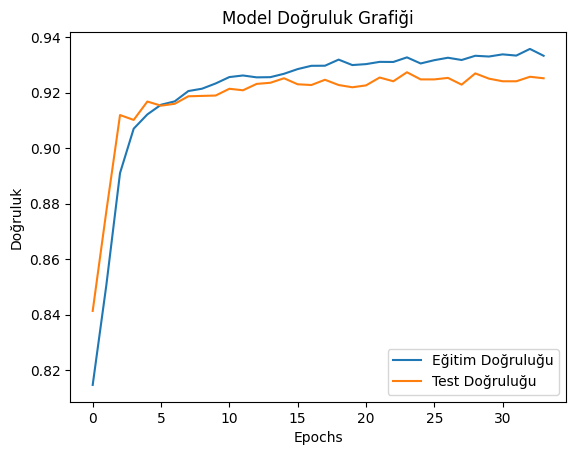

In [11]:
# Modelin eğitim ve test doğruluğunu görselleştiriyoruz
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Test Doğruluğu')
plt.title('Model Doğruluk Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [12]:
# İlk epoch'taki eğitim ve test doğruluğu
print(f"İlk Eğitim Doğruluğu: {history.history['accuracy'][0]}")
print(f"İlk Test Doğruluğu: {history.history['val_accuracy'][0]}")

# Son epoch'taki eğitim ve test doğruluğu
print(f"Son Eğitim Doğruluğu: {history.history['accuracy'][-1]}")
print(f"Son Test Doğruluğu: {history.history['val_accuracy'][-1]}")

İlk Eğitim Doğruluğu: 0.8146858811378479
İlk Test Doğruluğu: 0.8413299322128296
Son Eğitim Doğruluğu: 0.9332274794578552
Son Test Doğruluğu: 0.925125002861023


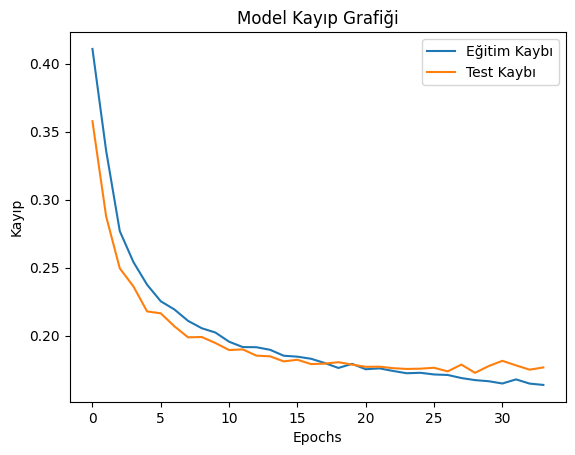

In [13]:
# Modelin kaybını görselleştiriyoruz
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Test Kaybı')
plt.title('Model Kayıp Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

In [14]:
# İlk epoch'taki eğitim ve test kaybı
print(f"İlk Eğitim Kaybı: {history.history['loss'][0]}")
print(f"İlk Test Kaybı: {history.history['val_loss'][0]}")

# Son epoch'taki eğitim ve test kaybı
print(f"Son Eğitim Kaybı: {history.history['loss'][-1]}")
print(f"Son Test Kaybı: {history.history['val_loss'][-1]}")


İlk Eğitim Kaybı: 0.41075533628463745
İlk Test Kaybı: 0.35763972997665405
Son Eğitim Kaybı: 0.16383692622184753
Son Test Kaybı: 0.17669181525707245


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

Karışıklık Matrisi:
[[3056  321]
 [ 220 3802]]


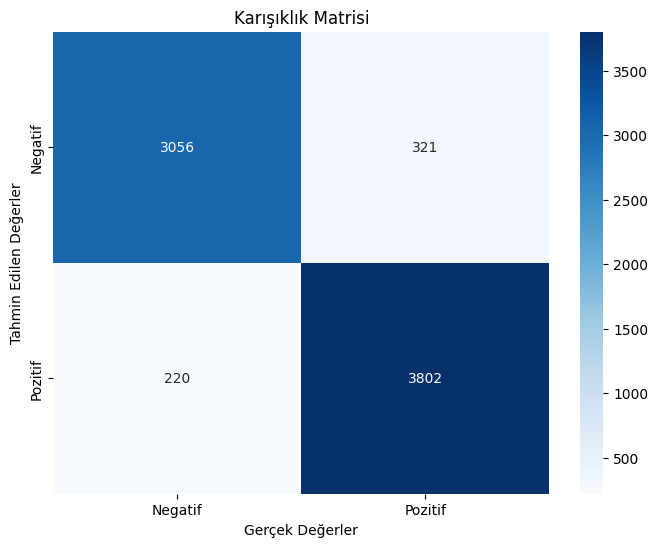

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:")
print(cm)
# Karışıklık Matrisini Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.title("Karışıklık Matrisi")
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.show()

In [17]:
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")


True Negatives: 3056, False Positives: 321, False Negatives: 220, True Positives: 3802


In [18]:
# Sınıflandırma Raporu
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3377
           1       0.92      0.95      0.93      4022

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


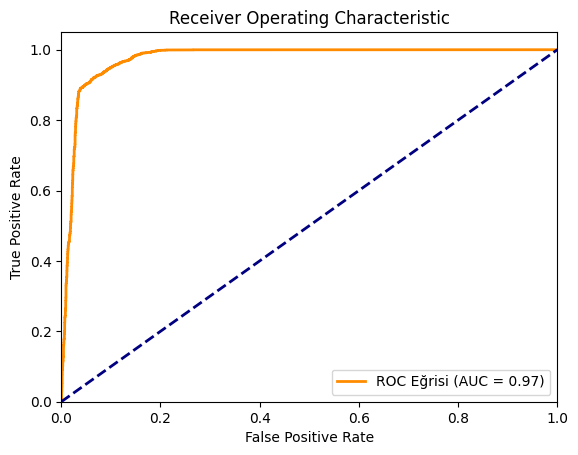

In [19]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
roc_auc

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [20]:
roc_auc

0.974553856660738

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step


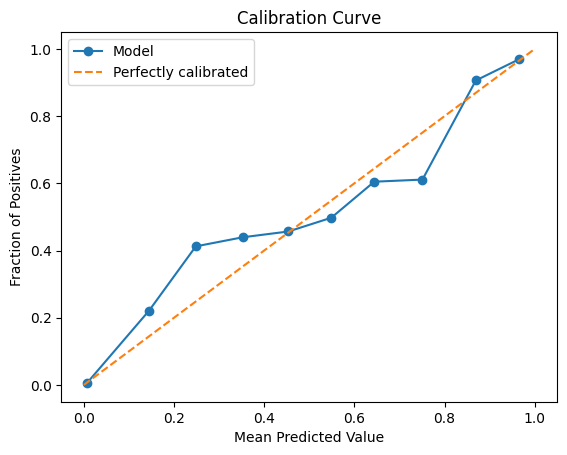

Mean Predicted Value (Ortalama Tahmin Edilen Değerler):
[0.00668594 0.14486758 0.24834629 0.35224861 0.45364351 0.54882068
 0.6440674  0.75100695 0.86935655 0.96478121]

Fraction of Positives (Pozitiflerin Oranı):
[0.0051039  0.22137405 0.41237113 0.43939394 0.4566474  0.49753695
 0.60483871 0.61111111 0.90610329 0.96892086]


In [21]:
from sklearn.calibration import calibration_curve

# Modelin test verisindeki olasılık tahminlerini alıyoruz
prob_pos = model.predict(X_test)

# Calibration curve'ü hesaplıyoruz
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

# Grafiği çiziyoruz
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label="Model")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfectly calibrated")
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Sayısal sonuçları yazdırıyoruz
print("Mean Predicted Value (Ortalama Tahmin Edilen Değerler):")
print(mean_predicted_value)

print("\nFraction of Positives (Pozitiflerin Oranı):")
print(fraction_of_positives)
